#  EastWestAirlines 

##  Hierarchical Clustering

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [2]:
airlines = pd.read_csv("EastWestAirlines.csv")
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
airlines_1 = airlines.copy()

###  Normalize the dataset 

In [4]:
normalize = MinMaxScaler()
data = pd.DataFrame(normalize.fit_transform(airlines.iloc[:,1:]))
data

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


###  Optimal number of clusters using dendogram by complete linkage method

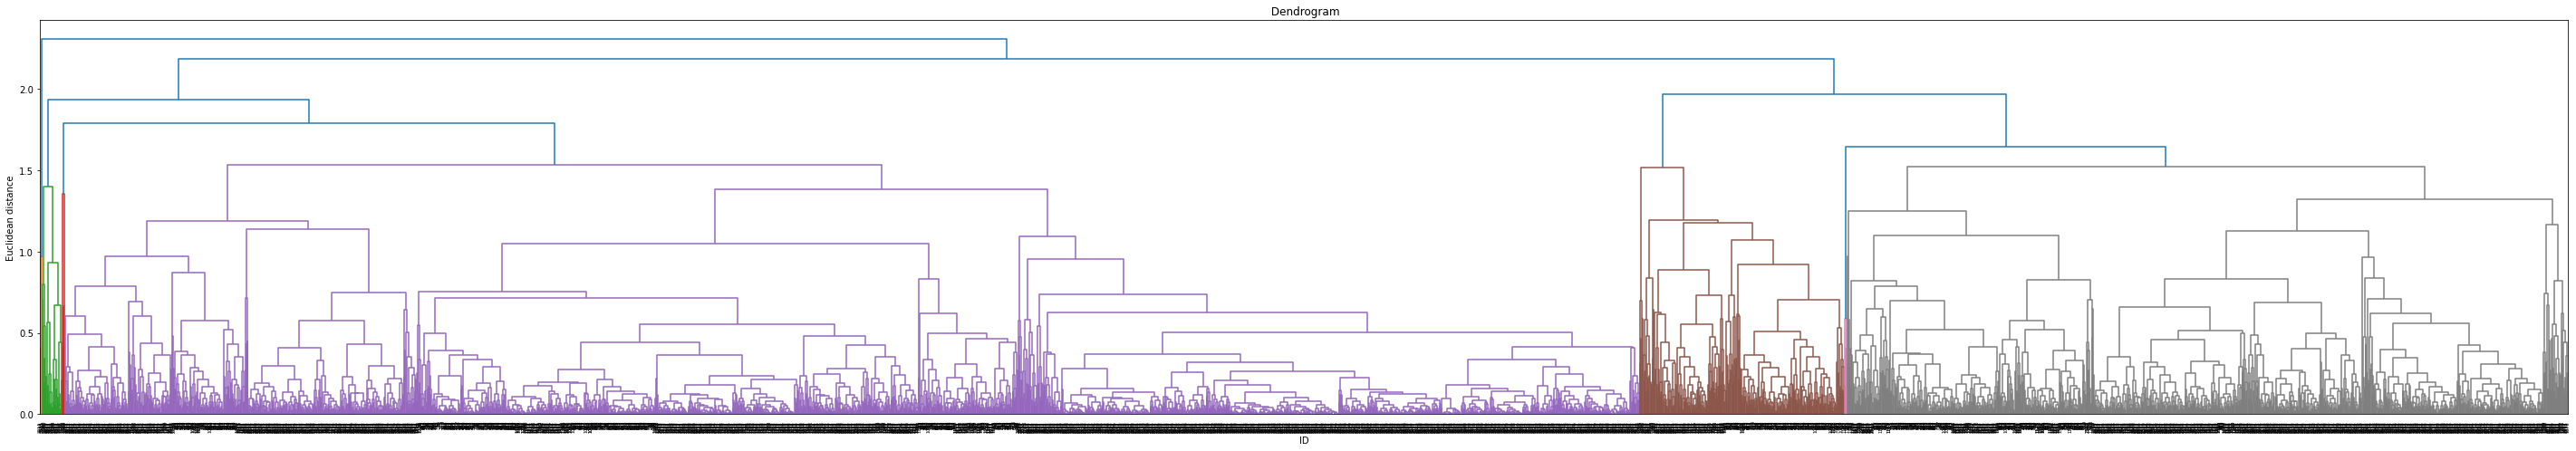

In [6]:
hie = linkage(data, method = "complete", metric= "euclidean")
plt.figure(figsize=(50,8))
plt.title(" Dendrogram")
plt.xlabel("ID")
plt.ylabel("Euclidean distance")
sch.dendrogram(hie)
plt.show()


### Hierarchical Clustering model 

In [32]:
hc = AgglomerativeClustering(n_clusters=5 , affinity="euclidean", linkage="complete" ).fit(data)
cluster_labels=pd.Series(hc.labels_)
cluster_labels
airlines['cluster']=cluster_labels
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [33]:
airlines.iloc[:,1:12].groupby(airlines.cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
0,59968.433667,88.883768,1.712224,1.000401,1.011222,10271.530261,9.105812,227.797194,0.656112,3825.392786,0.000802
1,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548


###  Visualizing the cluster 

Text(0.5, 1.0, 'Clusters using H-Clustering')

<Figure size 1440x504 with 0 Axes>

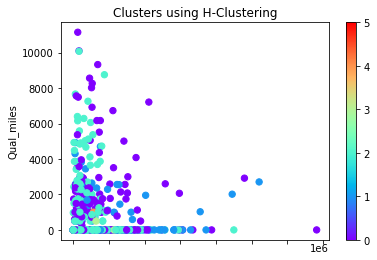

In [29]:
plt.figure(figsize=(20,7))
airlines.plot(x="Balance",y ="Qual_miles",c=hc.labels_, kind="scatter",s=40 ,cmap="rainbow") 
plt.title('Clusters using H-Clustering')

<AxesSubplot:xlabel='cluster', ylabel='Balance'>

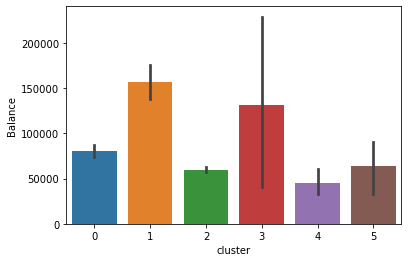

In [30]:
sns.barplot(data=airlines,x='cluster',y='Balance')

<AxesSubplot:xlabel='cluster', ylabel='Qual_miles'>

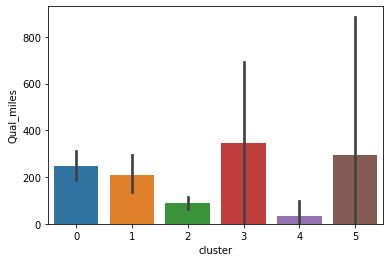

In [31]:
sns.barplot(data=airlines,x='cluster',y='Qual_miles')

##  Inference from hierarchical clustering

###   Passengers in cluster 0 has lower number of miles and their 12 month flight transaction and bonus for non flight transaction are also very less so they are not eligible for awards and topflights 

###   Passengers in Cluster 1 is eligible for award and topflight because they have highest number of miles for qualifyling awards with comparatively higher number of flight transaction in past 12 months 

###   Passengers in Cluster 2 is eligible for award and topflight because they have comparatively higher number of miles and past 12 months flight transaction also 

###   Passengers in Cluster 3 is eligible for award and topflight because they have highest number of flight transaction in the past 12 months  with higher number of miles required for both award and topflight howerver their bonus transaction is also very high  

###    Passengers in Cluster 4 has less number of miles so they are not qualified for topflights because they enrolled for a less period of time 